In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [2]:
base  = pd.read_excel('BaseRobertsCRM.xlsx')

base= base.drop("Nombre",axis=1)
base= base.drop("Apellido",axis=1)

In [5]:
base['Fecha Registro']=pd.to_datetime(base['Fecha Registro'],format="%Y-%m-%d")

In [8]:
FechaMax = base['Fecha Registro'].max()
print(FechaMax)

2020-01-12 00:00:00


In [9]:
RFM = pd.DataFrame()

In [10]:
# Cargar catálogo de clientes

RFM['Mail']=base['Mail'].unique()

In [11]:
fechas = base.groupby(['Mail'])['Fecha Registro'].max().reset_index()

In [12]:
fechas.rename(columns = {'Fecha Registro': 'Fecha_Max'},inplace=True)

In [13]:
RFM2 = pd.merge(RFM,fechas, on='Mail',how='outer')

In [14]:
RFM2.head()

Mail  Fecha_Max
0            e.mazazac@gmail.com 2019-12-30
1          osmar220113@gmail.com 2020-01-12
2  carlos.gonzalezv.cg@gmail.com 2020-01-12
3            ferson807@gmail.com 2020-01-12
4        jorgeanton1@hotmail.com 2020-01-12

In [15]:
num_compras = base.groupby(['Mail'])['Fecha Registro'].nunique().reset_index()

In [16]:
num_compras.rename(columns = {'Fecha Registro': 'Frecuencia'},inplace=True)

In [17]:
num_compras.head()

Mail  Frecuencia
0                        0175701@up.edu.mx           1
1  05castroespinosadelosmonteros@gmail.com           1
2                       0604.jes@gmail.com           1
3               0907esperansas@hotmail.com           1
4                   11axelamaury@gmail.com           1

In [18]:
RFM3 = pd.merge(RFM2,num_compras, on='Mail')

In [19]:
RFM3.head()

Mail  Fecha_Max  Frecuencia
0            e.mazazac@gmail.com 2019-12-30           1
1          osmar220113@gmail.com 2020-01-12           1
2  carlos.gonzalezv.cg@gmail.com 2020-01-12           1
3            ferson807@gmail.com 2020-01-12           1
4        jorgeanton1@hotmail.com 2020-01-12           1

In [20]:
monto = base.groupby(['Mail'])['Importe'].sum().reset_index()
RFM4 = pd.merge(RFM3,monto, on='Mail')
RFM4['Dias'] = FechaMax - RFM4['Fecha_Max']
RFM4['Dias']=RFM4['Dias'].astype('timedelta64[D]')

In [21]:
RFM4.head()

Mail  Fecha_Max  Frecuencia   Importe  Dias
0            e.mazazac@gmail.com 2019-12-30           1   4301.72  13.0
1          osmar220113@gmail.com 2020-01-12           1   4174.14   0.0
2  carlos.gonzalezv.cg@gmail.com 2020-01-12           1   7489.67   0.0
3            ferson807@gmail.com 2020-01-12           1  17402.74   0.0
4        jorgeanton1@hotmail.com 2020-01-12           1   1842.25   0.0

In [22]:
RFM4.quantile(np.linspace(0,1,6))

Frecuencia     Importe   Dias
0.0         1.0      59.480    0.0
0.2         1.0    2146.550   58.0
0.4         1.0    4218.100   79.6
0.6         1.0    6095.862  106.0
0.8         1.0    9306.728  136.0
1.0        11.0  318111.520  164.0

In [23]:
lista_dias = RFM4.quantile(np.linspace(0,1,6))['Dias'].to_list()
inter_dias= []
for x in range(0,5):
    inter_dias.append(list( ( lista_dias[x],lista_dias[x+1]) ) )
    
    
inter_dias.reverse()

inter_dias

[[136.0, 164.0],
 [106.0, 136.0],
 [79.60000000000036, 106.0],
 [58.0, 79.60000000000036],
 [0.0, 58.0]]

In [24]:
lista_imp = RFM4.quantile(np.linspace(0,1,6))['Importe'].to_list()
inter_imp= []
for x in range(0,5):
    inter_imp.append(list( ( lista_imp[x],lista_imp[x+1]) ) )
    
inter_imp

[[59.48, 2146.55],
 [2146.55, 4218.1],
 [4218.1, 6095.862000000001],
 [6095.862000000001, 9306.728000000003],
 [9306.728000000003, 318111.5200000001]]

In [29]:
#ANALIZAR
RFM4['Frecuencia'].unique()

array([ 1,  2,  4,  5,  3,  6, 11,  7,  9], dtype=int64)

In [30]:
inter_freq = list( ([0,1],[2,3],[4,5],[6,7],[8,11]) )

In [31]:
for x,y in RFM4.iterrows():
    for z in range(len(inter_freq)):
        if (y['Frecuencia']>=inter_freq[z][0] and y['Frecuencia']<= inter_freq[z][1]):
            print(y['Frecuencia'],inter_freq[z][0],inter_freq[z][1],z+1)
            RFM4.loc[x,'F_class']=(z+1)

1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
5 4 5 3
1 0 1 1
3 2 3 2
3 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
3 2 3 2
2 2 3 2
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
6 6 7 4
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
3 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1


2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
4 4 5 3
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
3 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
2 2 3 2
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1
1 0 1 1


In [32]:
for x,y in RFM4.iterrows():
    for z in range(len(inter_dias)):
        if (y['Dias']>=inter_dias[z][0] and y['Dias']<= inter_dias[z][1]):
            print(y['Dias'],inter_dias[z][0],inter_dias[z][1],z+1)
            RFM4.loc[x,'R_class']=(z+1)

13.0 0.0 58.0 5
0.0 0.0 58.0 5
0.0 0.0 58.0 5
0.0 0.0 58.0 5
0.0 0.0 58.0 5
2.0 0.0 58.0 5
2.0 0.0 58.0 5
3.0 0.0 58.0 5
3.0 0.0 58.0 5
4.0 0.0 58.0 5
5.0 0.0 58.0 5
6.0 0.0 58.0 5
7.0 0.0 58.0 5
7.0 0.0 58.0 5
7.0 0.0 58.0 5
8.0 0.0 58.0 5
8.0 0.0 58.0 5
9.0 0.0 58.0 5
9.0 0.0 58.0 5
9.0 0.0 58.0 5
9.0 0.0 58.0 5
9.0 0.0 58.0 5
11.0 0.0 58.0 5
47.0 0.0 58.0 5
42.0 0.0 58.0 5
43.0 0.0 58.0 5
42.0 0.0 58.0 5
45.0 0.0 58.0 5
40.0 0.0 58.0 5
43.0 0.0 58.0 5
42.0 0.0 58.0 5
43.0 0.0 58.0 5
47.0 0.0 58.0 5
46.0 0.0 58.0 5
42.0 0.0 58.0 5
44.0 0.0 58.0 5
40.0 0.0 58.0 5
48.0 0.0 58.0 5
46.0 0.0 58.0 5
40.0 0.0 58.0 5
42.0 0.0 58.0 5
44.0 0.0 58.0 5
41.0 0.0 58.0 5
40.0 0.0 58.0 5
45.0 0.0 58.0 5
43.0 0.0 58.0 5
41.0 0.0 58.0 5
42.0 0.0 58.0 5
43.0 0.0 58.0 5
43.0 0.0 58.0 5
43.0 0.0 58.0 5
43.0 0.0 58.0 5
41.0 0.0 58.0 5
42.0 0.0 58.0 5
42.0 0.0 58.0 5
44.0 0.0 58.0 5
42.0 0.0 58.0 5
47.0 0.0 58.0 5
45.0 0.0 58.0 5
45.0 0.0 58.0 5
43.0 0.0 58.0 5
44.0 0.0 58.0 5
48.0 0.0 58.0 5
42.0 0.0 58.0

73.0 58.0 79.60000000000036 4
89.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
84.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
82.0 79.60000000000036 106.0 3
84.0 79.60000000000036 106.0 3
91.0 79.60000000000036 106.0 3
99.0 79.60000000000036 106.0 3
97.0 79.60000000000036 106.0 3
101.0 79.60000000000036 106.0 3
103.0 79.60000000000036 106.0 3
79.0 58.0 79.60000000000036 4
78.0 58.0 79.60000000000036 4
72.0 58.0 79.60000000000036 4
77.0 58.0 79.60000000000036 4
87.0 79.60000000000036 106.0 3
90.0 79.60000000000036 106.0 3
72.0 58.0 79.60000000000036 4
77.0 58.0 79.60000000000036 4
78.0 58.0 79.60000000000036 4
72.0 58.0 79.60000000000036 4
85.0 79.60000000000036 106.0 3
97.0 79.60000000000036 106.0 3
82.0 79.60000000000036 106.0 3
87.0 79.60000000000036 106.0 3
91.0 79.60000000000036 106.0 3
85.0 79.60000000000036 106.0 3
78.0 58.0 79.60000000000036 4
87.0 79.60000000000036 106.0 3
88.0 79.60000000000036 106.0 3
82.0 79.60000000000036 106.0 3
73.0 58.0 79.600

99.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
79.0 58.0 79.60000000000036 4
59.0 58.0 79.60000000000036 4
77.0 58.0 79.60000000000036 4
77.0 58.0 79.60000000000036 4
77.0 58.0 79.60000000000036 4
86.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
76.0 58.0 79.60000000000036 4
91.0 79.60000000000036 106.0 3
91.0 79.60000000000036 106.0 3
78.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
92.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
94.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
74.0 58.0 79.60000000000036 4
74.0 58.0 79.60000000000036 4
81.0 79.60000000000036 106.0 3
75.0 58.0 79.60000000000036 4
86.0 79.60000000000036 106.0 3
103.0 79.60000000000036 106.0 3
79.0 58.0 79.60000000000036 4
85.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
96.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
93.0 79.60000000000036 106.0 3
99.0 79.60000000000036 106.0 3
99.0 79.60000000000036 106.0 3
78.0 58.0 79.6000000

145.0 136.0 164.0 1
161.0 136.0 164.0 1
126.0 106.0 136.0 2
107.0 106.0 136.0 2
155.0 136.0 164.0 1
145.0 136.0 164.0 1
154.0 136.0 164.0 1
150.0 136.0 164.0 1
154.0 136.0 164.0 1
137.0 136.0 164.0 1
153.0 136.0 164.0 1
150.0 136.0 164.0 1
162.0 136.0 164.0 1
134.0 106.0 136.0 2
134.0 106.0 136.0 2
154.0 136.0 164.0 1
147.0 136.0 164.0 1
148.0 136.0 164.0 1
159.0 136.0 164.0 1
157.0 136.0 164.0 1
155.0 136.0 164.0 1
147.0 136.0 164.0 1
156.0 136.0 164.0 1
156.0 136.0 164.0 1
154.0 136.0 164.0 1
156.0 136.0 164.0 1
158.0 136.0 164.0 1
153.0 136.0 164.0 1
150.0 136.0 164.0 1
163.0 136.0 164.0 1
156.0 136.0 164.0 1
154.0 136.0 164.0 1
154.0 136.0 164.0 1
150.0 136.0 164.0 1
135.0 106.0 136.0 2
140.0 136.0 164.0 1
135.0 106.0 136.0 2
154.0 136.0 164.0 1
150.0 136.0 164.0 1
140.0 136.0 164.0 1
143.0 136.0 164.0 1
145.0 136.0 164.0 1
150.0 136.0 164.0 1
70.0 58.0 79.60000000000036 4
155.0 136.0 164.0 1
106.0 106.0 136.0 2
106.0 79.60000000000036 106.0 3
134.0 106.0 136.0 2
107.0 106.0 136.0 

160.0 136.0 164.0 1
146.0 136.0 164.0 1
148.0 136.0 164.0 1
149.0 136.0 164.0 1
134.0 106.0 136.0 2
116.0 106.0 136.0 2
134.0 106.0 136.0 2
116.0 106.0 136.0 2
152.0 136.0 164.0 1
60.0 58.0 79.60000000000036 4
148.0 136.0 164.0 1
86.0 79.60000000000036 106.0 3
112.0 106.0 136.0 2
161.0 136.0 164.0 1
150.0 136.0 164.0 1
108.0 106.0 136.0 2
137.0 136.0 164.0 1
147.0 136.0 164.0 1
158.0 136.0 164.0 1
141.0 136.0 164.0 1
148.0 136.0 164.0 1
147.0 136.0 164.0 1
161.0 136.0 164.0 1
150.0 136.0 164.0 1
157.0 136.0 164.0 1
164.0 136.0 164.0 1
149.0 136.0 164.0 1
138.0 136.0 164.0 1
149.0 136.0 164.0 1
137.0 136.0 164.0 1
134.0 106.0 136.0 2
128.0 106.0 136.0 2
135.0 106.0 136.0 2
134.0 106.0 136.0 2
147.0 136.0 164.0 1
141.0 136.0 164.0 1
142.0 136.0 164.0 1
149.0 136.0 164.0 1
161.0 136.0 164.0 1
162.0 136.0 164.0 1
146.0 136.0 164.0 1
162.0 136.0 164.0 1
139.0 136.0 164.0 1
139.0 136.0 164.0 1
148.0 136.0 164.0 1
134.0 106.0 136.0 2
145.0 136.0 164.0 1
135.0 106.0 136.0 2
106.0 106.0 136.0 2

114.0 106.0 136.0 2
112.0 106.0 136.0 2
120.0 106.0 136.0 2
120.0 106.0 136.0 2
121.0 106.0 136.0 2
108.0 106.0 136.0 2
120.0 106.0 136.0 2
113.0 106.0 136.0 2
113.0 106.0 136.0 2
114.0 106.0 136.0 2
124.0 106.0 136.0 2
56.0 0.0 58.0 5
133.0 106.0 136.0 2
120.0 106.0 136.0 2
115.0 106.0 136.0 2
112.0 106.0 136.0 2
128.0 106.0 136.0 2
112.0 106.0 136.0 2
116.0 106.0 136.0 2
133.0 106.0 136.0 2
122.0 106.0 136.0 2
126.0 106.0 136.0 2
119.0 106.0 136.0 2
111.0 106.0 136.0 2
133.0 106.0 136.0 2
133.0 106.0 136.0 2
121.0 106.0 136.0 2
119.0 106.0 136.0 2
125.0 106.0 136.0 2
116.0 106.0 136.0 2
118.0 106.0 136.0 2
127.0 106.0 136.0 2
127.0 106.0 136.0 2
128.0 106.0 136.0 2
105.0 79.60000000000036 106.0 3
130.0 106.0 136.0 2
112.0 106.0 136.0 2
108.0 106.0 136.0 2
126.0 106.0 136.0 2
112.0 106.0 136.0 2
56.0 0.0 58.0 5
114.0 106.0 136.0 2
64.0 58.0 79.60000000000036 4
124.0 106.0 136.0 2
55.0 0.0 58.0 5
116.0 106.0 136.0 2
129.0 106.0 136.0 2
119.0 106.0 136.0 2
127.0 106.0 136.0 2
126.0 106.

43.0 0.0 58.0 5
42.0 0.0 58.0 5
41.0 0.0 58.0 5
44.0 0.0 58.0 5
45.0 0.0 58.0 5
40.0 0.0 58.0 5
44.0 0.0 58.0 5
46.0 0.0 58.0 5
43.0 0.0 58.0 5
46.0 0.0 58.0 5
48.0 0.0 58.0 5
47.0 0.0 58.0 5
44.0 0.0 58.0 5
42.0 0.0 58.0 5
47.0 0.0 58.0 5
42.0 0.0 58.0 5
48.0 0.0 58.0 5
43.0 0.0 58.0 5
45.0 0.0 58.0 5
43.0 0.0 58.0 5
47.0 0.0 58.0 5
48.0 0.0 58.0 5
43.0 0.0 58.0 5
42.0 0.0 58.0 5
45.0 0.0 58.0 5
40.0 0.0 58.0 5
45.0 0.0 58.0 5
40.0 0.0 58.0 5
46.0 0.0 58.0 5
47.0 0.0 58.0 5
41.0 0.0 58.0 5
40.0 0.0 58.0 5
47.0 0.0 58.0 5
40.0 0.0 58.0 5
46.0 0.0 58.0 5
42.0 0.0 58.0 5
41.0 0.0 58.0 5
40.0 0.0 58.0 5
42.0 0.0 58.0 5
41.0 0.0 58.0 5
42.0 0.0 58.0 5
43.0 0.0 58.0 5
47.0 0.0 58.0 5
42.0 0.0 58.0 5
42.0 0.0 58.0 5
45.0 0.0 58.0 5
43.0 0.0 58.0 5
43.0 0.0 58.0 5
42.0 0.0 58.0 5
42.0 0.0 58.0 5
49.0 0.0 58.0 5
43.0 0.0 58.0 5
42.0 0.0 58.0 5
41.0 0.0 58.0 5
48.0 0.0 58.0 5
43.0 0.0 58.0 5
47.0 0.0 58.0 5
47.0 0.0 58.0 5
44.0 0.0 58.0 5
43.0 0.0 58.0 5
41.0 0.0 58.0 5
45.0 0.0 58.0 5
40.0 0.0

98.0 79.60000000000036 106.0 3
75.0 58.0 79.60000000000036 4
84.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
55.0 0.0 58.0 5
93.0 79.60000000000036 106.0 3
76.0 58.0 79.60000000000036 4
71.0 58.0 79.60000000000036 4
95.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
93.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
98.0 79.60000000000036 106.0 3
99.0 79.60000000000036 106.0 3
84.0 79.60000000000036 106.0 3
74.0 58.0 79.60000000000036 4
70.0 58.0 79.60000000000036 4
74.0 58.0 79.60000000000036 4
86.0 79.60000000000036 106.0 3
91.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
84.0 79.60000000000036 106.0 3
91.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
74.0 58.0 79.60000000000036 4
88.0 79.60000000000036 106.0 3
94.0 79.60000000000036 106.0 3
97.0 79.60000000000036 106.0 3
73.0 58.0 79.60000000000036 4
102.0 79.60000000000036 106.0 3
10

85.0 79.60000000000036 106.0 3
101.0 79.60000000000036 106.0 3
78.0 58.0 79.60000000000036 4
84.0 79.60000000000036 106.0 3
74.0 58.0 79.60000000000036 4
92.0 79.60000000000036 106.0 3
83.0 79.60000000000036 106.0 3
95.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
91.0 79.60000000000036 106.0 3
101.0 79.60000000000036 106.0 3
86.0 79.60000000000036 106.0 3
83.0 79.60000000000036 106.0 3
72.0 58.0 79.60000000000036 4
92.0 79.60000000000036 106.0 3
88.0 79.60000000000036 106.0 3
74.0 58.0 79.60000000000036 4
80.0 79.60000000000036 106.0 3
75.0 58.0 79.60000000000036 4
96.0 79.60000000000036 106.0 3
72.0 58.0 79.60000000000036 4
99.0 79.60000000000036 106.0 3
72.0 58.0 79.60000000000036 4
91.0 79.60000000000036 106.0 3
85.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
84.0 79.60000000000036 106.0 3
99.0 79.60000000000036 106.0 3
77.0 58.0 79.60000000000036 4
99.0 79.60000000000036 106.0 3
92.0 79.60000000000036 106.0 3
81.0 79.60000000000036 106.0 3
59.0 58.0 79.600

148.0 136.0 164.0 1
107.0 106.0 136.0 2
149.0 136.0 164.0 1
160.0 136.0 164.0 1
155.0 136.0 164.0 1
149.0 136.0 164.0 1
144.0 136.0 164.0 1
161.0 136.0 164.0 1
159.0 136.0 164.0 1
140.0 136.0 164.0 1
146.0 136.0 164.0 1
109.0 106.0 136.0 2
156.0 136.0 164.0 1
135.0 106.0 136.0 2
135.0 106.0 136.0 2
141.0 136.0 164.0 1
164.0 136.0 164.0 1
154.0 136.0 164.0 1
140.0 136.0 164.0 1
134.0 106.0 136.0 2
137.0 136.0 164.0 1
148.0 136.0 164.0 1
142.0 136.0 164.0 1
130.0 106.0 136.0 2
128.0 106.0 136.0 2
154.0 136.0 164.0 1
154.0 136.0 164.0 1
144.0 136.0 164.0 1
142.0 136.0 164.0 1
138.0 136.0 164.0 1
141.0 136.0 164.0 1
141.0 136.0 164.0 1
148.0 136.0 164.0 1
132.0 106.0 136.0 2
70.0 58.0 79.60000000000036 4
141.0 136.0 164.0 1
119.0 106.0 136.0 2
139.0 136.0 164.0 1
144.0 136.0 164.0 1
162.0 136.0 164.0 1
164.0 136.0 164.0 1
161.0 136.0 164.0 1
158.0 136.0 164.0 1
141.0 136.0 164.0 1
155.0 136.0 164.0 1
141.0 136.0 164.0 1
141.0 136.0 164.0 1
140.0 136.0 164.0 1
63.0 58.0 79.60000000000036 4


144.0 136.0 164.0 1
136.0 136.0 164.0 1
136.0 106.0 136.0 2
154.0 136.0 164.0 1
154.0 136.0 164.0 1
122.0 106.0 136.0 2
65.0 58.0 79.60000000000036 4
141.0 136.0 164.0 1
154.0 136.0 164.0 1
158.0 136.0 164.0 1
158.0 136.0 164.0 1
113.0 106.0 136.0 2
134.0 106.0 136.0 2
140.0 136.0 164.0 1
140.0 136.0 164.0 1
149.0 136.0 164.0 1
163.0 136.0 164.0 1
141.0 136.0 164.0 1
140.0 136.0 164.0 1
159.0 136.0 164.0 1
154.0 136.0 164.0 1
147.0 136.0 164.0 1
147.0 136.0 164.0 1
148.0 136.0 164.0 1
144.0 136.0 164.0 1
155.0 136.0 164.0 1
156.0 136.0 164.0 1
55.0 0.0 58.0 5
145.0 136.0 164.0 1
135.0 106.0 136.0 2
155.0 136.0 164.0 1
146.0 136.0 164.0 1
140.0 136.0 164.0 1
149.0 136.0 164.0 1
149.0 136.0 164.0 1
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
160.0 136.0 164.0 1
151.0 136.0 164.0 1
135.0 106.0 136.0 2
158.0 136.0 164.0 1
150.0 136.0 164.0 1
152.0 136.0 164.0 1
142.0 136.0 164.0 1
144.0 136.0 164.0 1
148.0 136.0 164.0 1
162.0 136.0 164.0 1
161.0 136.0 164.0 1
138.0 136.0 164.0 1
146.0 13

115.0 106.0 136.0 2
118.0 106.0 136.0 2
119.0 106.0 136.0 2
126.0 106.0 136.0 2
107.0 106.0 136.0 2
133.0 106.0 136.0 2
112.0 106.0 136.0 2
106.0 106.0 136.0 2
106.0 79.60000000000036 106.0 3
111.0 106.0 136.0 2
109.0 106.0 136.0 2
111.0 106.0 136.0 2
126.0 106.0 136.0 2
120.0 106.0 136.0 2
113.0 106.0 136.0 2
120.0 106.0 136.0 2
121.0 106.0 136.0 2
113.0 106.0 136.0 2
113.0 106.0 136.0 2
131.0 106.0 136.0 2
129.0 106.0 136.0 2
126.0 106.0 136.0 2
113.0 106.0 136.0 2
109.0 106.0 136.0 2
109.0 106.0 136.0 2
122.0 106.0 136.0 2
123.0 106.0 136.0 2
119.0 106.0 136.0 2
105.0 79.60000000000036 106.0 3
109.0 106.0 136.0 2
118.0 106.0 136.0 2
133.0 106.0 136.0 2
114.0 106.0 136.0 2
116.0 106.0 136.0 2
130.0 106.0 136.0 2
115.0 106.0 136.0 2
105.0 79.60000000000036 106.0 3
133.0 106.0 136.0 2
128.0 106.0 136.0 2
113.0 106.0 136.0 2
129.0 106.0 136.0 2
117.0 106.0 136.0 2
133.0 106.0 136.0 2
104.0 79.60000000000036 106.0 3
105.0 79.60000000000036 106.0 3
130.0 106.0 136.0 2
106.0 106.0 136.0 2


110.0 106.0 136.0 2
105.0 79.60000000000036 106.0 3
115.0 106.0 136.0 2
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
126.0 106.0 136.0 2
115.0 106.0 136.0 2
119.0 106.0 136.0 2
121.0 106.0 136.0 2
116.0 106.0 136.0 2
107.0 106.0 136.0 2
121.0 106.0 136.0 2
115.0 106.0 136.0 2
127.0 106.0 136.0 2
113.0 106.0 136.0 2
104.0 79.60000000000036 106.0 3
109.0 106.0 136.0 2
132.0 106.0 136.0 2
55.0 0.0 58.0 5
126.0 106.0 136.0 2
118.0 106.0 136.0 2
125.0 106.0 136.0 2
63.0 58.0 79.60000000000036 4
111.0 106.0 136.0 2
65.0 58.0 79.60000000000036 4
129.0 106.0 136.0 2
112.0 106.0 136.0 2
112.0 106.0 136.0 2
106.0 106.0 136.0 2
106.0 79.60000000000036 106.0 3
132.0 106.0 136.0 2
115.0 106.0 136.0 2
117.0 106.0 136.0 2
112.0 106.0 136.0 2
133.0 106.0 136.0 2
125.0 106.0 136.0 2
120.0 106.0 136.0 2
107.0 106.0 136.0 2
113.0 106.0 136.0 2
107.0 106.0 136.0 2
132.0 106.0 136.0 2
125.0 106.0 136.0 2
106.0 106.0 136.0 2
106.0 79.60000000000036 106.0 3
112.0 106.0 136.0 2
114.0 106.0 136.0 2
109.0 106.

58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
57.0 0.0 58.0 5
56.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
56.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
55.0 0.0 58.0 5
63.0 58.0 79.60000000000036 4
53.0 0.0 58.0 5
55.0 0.0 58.0 5
55.0 0.0 58.0 5
57.0 0.0 58.0 5
64.0 58.0 79.60000000000036 4
71.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
68.0 58.0 79.60000000000036 4
71.0 58.0 79.60000000000036 4
54.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
56.0 0.0 58.0 5
57.0 0.0 58.0 5
57.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
65.0 58.0 79.60000000000036 4
64.0 58.0 79.60000000000036 4
65.0 58.0 79.60000000000036 4
64.0 58.0 79.60000000000036 4
71.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
57.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
58

56.0 0.0 58.0 5
65.0 58.0 79.60000000000036 4
70.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
56.0 0.0 58.0 5
66.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
56.0 0.0 58.0 5
57.0 0.0 58.0 5
56.0 0.0 58.0 5
57.0 0.0 58.0 5
65.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
56.0 0.0 58.0 5
57.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
61.0 58.0 79.60000000000036 4
59.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
55.0 0.0 58.0 5
57.0 0.0 58.0 5
57.0 0.0 58.0 5
55.0 0.0 58.0 5
63.0 58.0 79.60000000000036 4
67.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
55.0 0.0 58.0 5
69.0 58.0 79.60000000000036 4
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
56.0 0.0 58.0 5
55.0 0.0 58.0 5
56.0 0.0 58.0 5
63.0 58.0 79.60000000000036 4
59.0 58.0 79.60000000000036 4
68.0 58.0 79.60000000000036 4
70.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
58.0 58.0 79.6

71.0 58.0 79.60000000000036 4
69.0 58.0 79.60000000000036 4
61.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
63.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
65.0 58.0 79.60000000000036 4
53.0 0.0 58.0 5
67.0 58.0 79.60000000000036 4
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
57.0 0.0 58.0 5
57.0 0.0 58.0 5
56.0 0.0 58.0 5
57.0 0.0 58.0 5
54.0 0.0 58.0 5
71.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
56.0 0.0 58.0 5
56.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
66.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
55.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
57.0 0.0 58.0 5
65.0 58.0 79.60000000000036 4
66.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
68.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
55.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
71.0 58.0 79.60000000000036 4
62.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
43

55.0 0.0 58.0 5
55.0 0.0 58.0 5
65.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
63.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
57.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
55.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
57.0 0.0 58.0 5
55.0 0.0 58.0 5
57.0 0.0 58.0 5
67.0 58.0 79.60000000000036 4
70.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
56.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
71.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
81.0 79.60000000000036 106.0 3
56.0 0.0 58.0 5
55.0 0.0 58.0 5
64.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
65.0 58.0 79.60000000000036 4
71.0 58.0 79.60000000000036 4
67.0 58.0 79.60000000000036 4
56.0 0.0 58.0 5
55.0 0.0 58.0 5
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
59.0 58.0 79.60000000000036 4
58.0 58.0 79.60000000000036 4
58.0 0.0 58.0 5
70.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
68.0 58.0 79.60000000000036 4
63.0 58.0 79.60000000000036 4
55.0 0.0 58.0 5
55.0 0.0 58.0 5
57.0 0.0 58.0 5

In [33]:
for x,y in RFM4.iterrows():
    for z in range(len(inter_imp)):
        if (y['Importe']>=inter_imp[z][0] and y['Importe']<= inter_imp[z][1]):
            print(y['Importe'],inter_imp[z][0],inter_imp[z][1],z+1)
            RFM4.loc[x,'M_class']=(z+1)

4301.72 4218.1 6095.862000000001 3
4174.14 2146.55 4218.1 2
7489.67 6095.862000000001 9306.728000000003 4
17402.74 9306.728000000003 318111.5200000001 5
1842.25 59.48 2146.55 1
3518.96 2146.55 4218.1 2
18420.69 9306.728000000003 318111.5200000001 5
8906.21 6095.862000000001 9306.728000000003 4
1625.0 59.48 2146.55 1
6397.42 6095.862000000001 9306.728000000003 4
5600.849999999999 4218.1 6095.862000000001 3
13337.93 9306.728000000003 318111.5200000001 5
6620.01 6095.862000000001 9306.728000000003 4
2318.97 2146.55 4218.1 2
3383.0200000000004 2146.55 4218.1 2
5387.93 4218.1 6095.862000000001 3
2191.38 2146.55 4218.1 2
2520.6899999999996 2146.55 4218.1 2
4434.4800000000005 4218.1 6095.862000000001 3
13098.28 9306.728000000003 318111.5200000001 5
9943.099999999999 9306.728000000003 318111.5200000001 5
8235.34 6095.862000000001 9306.728000000003 4
3862.07 2146.55 4218.1 2
4793.11 4218.1 6095.862000000001 3
6002.58 4218.1 6095.862000000001 3
7909.4800000000005 6095.862000000001 9306.728000000

7218.1 6095.862000000001 9306.728000000003 4
4744.83 4218.1 6095.862000000001 3
6310.599999999999 6095.862000000001 9306.728000000003 4
2710.08 2146.55 4218.1 2
5803.0599999999995 4218.1 6095.862000000001 3
1133.1899999999998 59.48 2146.55 1
6801.72 6095.862000000001 9306.728000000003 4
1965.52 59.48 2146.55 1
6460.35 6095.862000000001 9306.728000000003 4
1448.28 59.48 2146.55 1
5077.59 4218.1 6095.862000000001 3
4628.449999999999 4218.1 6095.862000000001 3
3811.0699999999997 2146.55 4218.1 2
7600.860000000001 6095.862000000001 9306.728000000003 4
4975.86 4218.1 6095.862000000001 3
4126.93 2146.55 4218.1 2
9643.1 9306.728000000003 318111.5200000001 5
4601.549999999999 4218.1 6095.862000000001 3
7228.450000000001 6095.862000000001 9306.728000000003 4
6578.4400000000005 6095.862000000001 9306.728000000003 4
5382.76 4218.1 6095.862000000001 3
10621.29 9306.728000000003 318111.5200000001 5
4601.72 4218.1 6095.862000000001 3
15504.3 9306.728000000003 318111.5200000001 5
5909.4800000000005 4

861.21 59.48 2146.55 1
5071.55 4218.1 6095.862000000001 3
8931.050000000001 6095.862000000001 9306.728000000003 4
11150.859999999999 9306.728000000003 318111.5200000001 5
2001.72 59.48 2146.55 1
4821.55 4218.1 6095.862000000001 3
1275.86 59.48 2146.55 1
8430.17 6095.862000000001 9306.728000000003 4
7137.93 6095.862000000001 9306.728000000003 4
12198.27 9306.728000000003 318111.5200000001 5
5163.79 4218.1 6095.862000000001 3
5077.59 4218.1 6095.862000000001 3
1208.62 59.48 2146.55 1
7102.59 6095.862000000001 9306.728000000003 4
8393.970000000001 6095.862000000001 9306.728000000003 4
3111.73 2146.55 4218.1 2
14205.18 9306.728000000003 318111.5200000001 5
2365.51 2146.55 4218.1 2
14854.320000000002 9306.728000000003 318111.5200000001 5
5077.59 4218.1 6095.862000000001 3
681.03 59.48 2146.55 1
1715.52 59.48 2146.55 1
11189.650000000001 9306.728000000003 318111.5200000001 5
12476.720000000001 9306.728000000003 318111.5200000001 5
11965.52 9306.728000000003 318111.5200000001 5
6887.93 6095.8

336.21 59.48 2146.55 1
10331.89 9306.728000000003 318111.5200000001 5
7056.040000000001 6095.862000000001 9306.728000000003 4
689.22 59.48 2146.55 1
17950.87 9306.728000000003 318111.5200000001 5
5585.34 4218.1 6095.862000000001 3
2232.76 2146.55 4218.1 2
4030.17 2146.55 4218.1 2
18283.03 9306.728000000003 318111.5200000001 5
11831.910000000002 9306.728000000003 318111.5200000001 5
5749.999999999999 4218.1 6095.862000000001 3
55930.16999999999 9306.728000000003 318111.5200000001 5
1240.52 59.48 2146.55 1
65578.46000000002 9306.728000000003 318111.5200000001 5
20663.8 9306.728000000003 318111.5200000001 5
5077.59 4218.1 6095.862000000001 3
15121.559999999998 9306.728000000003 318111.5200000001 5
12475.86 9306.728000000003 318111.5200000001 5
7378.45 6095.862000000001 9306.728000000003 4
10379.31 9306.728000000003 318111.5200000001 5
11412.929999999998 9306.728000000003 318111.5200000001 5
17800.870000000003 9306.728000000003 318111.5200000001 5
778.45 59.48 2146.55 1
8512.07 6095.862000

6887.93 6095.862000000001 9306.728000000003 4
3223.2799999999997 2146.55 4218.1 2
12629.310000000001 9306.728000000003 318111.5200000001 5
5332.759999999999 4218.1 6095.862000000001 3
3551.7200000000003 2146.55 4218.1 2
2224.14 2146.55 4218.1 2
5447.419999999999 4218.1 6095.862000000001 3
6613.790000000001 6095.862000000001 9306.728000000003 4
5448.28 4218.1 6095.862000000001 3
3398.62 2146.55 4218.1 2
9017.240000000002 6095.862000000001 9306.728000000003 4
7637.929999999999 6095.862000000001 9306.728000000003 4
4757.77 4218.1 6095.862000000001 3
28241.38000000001 9306.728000000003 318111.5200000001 5
10922.41 9306.728000000003 318111.5200000001 5
8989.66 6095.862000000001 9306.728000000003 4
4212.07 2146.55 4218.1 2
6318.11 6095.862000000001 9306.728000000003 4
8172.41 6095.862000000001 9306.728000000003 4
2978.9700000000003 2146.55 4218.1 2
1870.69 59.48 2146.55 1
8827.59 6095.862000000001 9306.728000000003 4
6887.93 6095.862000000001 9306.728000000003 4
958.62 59.48 2146.55 1
1275.8

2146.55 59.48 2146.55 1
2146.55 2146.55 4218.1 2
3443.96 2146.55 4218.1 2
5077.59 4218.1 6095.862000000001 3
26068.1 9306.728000000003 318111.5200000001 5
7212.070000000001 6095.862000000001 9306.728000000003 4
767.24 59.48 2146.55 1
6833.620000000001 6095.862000000001 9306.728000000003 4
34684.310000000005 9306.728000000003 318111.5200000001 5
17125.86 9306.728000000003 318111.5200000001 5
13419.83 9306.728000000003 318111.5200000001 5
4340.0 4218.1 6095.862000000001 3
14465.52 9306.728000000003 318111.5200000001 5
853.45 59.48 2146.55 1
8769.83 6095.862000000001 9306.728000000003 4
5162.07 4218.1 6095.862000000001 3
5195.68 4218.1 6095.862000000001 3
5918.099999999999 4218.1 6095.862000000001 3
387.07 59.48 2146.55 1
6530.179999999999 6095.862000000001 9306.728000000003 4
6964.65 6095.862000000001 9306.728000000003 4
408.61 59.48 2146.55 1
1202.07 59.48 2146.55 1
5146.55 4218.1 6095.862000000001 3
3230.17 2146.55 4218.1 2
2923.27 2146.55 4218.1 2
4732.76 4218.1 6095.862000000001 3
74

5077.59 4218.1 6095.862000000001 3
5168.1 4218.1 6095.862000000001 3
3937.0700000000006 2146.55 4218.1 2
6557.76 6095.862000000001 9306.728000000003 4
7572.76 6095.862000000001 9306.728000000003 4
6848.62 6095.862000000001 9306.728000000003 4
3614.65 2146.55 4218.1 2
6519.82 6095.862000000001 9306.728000000003 4
5077.59 4218.1 6095.862000000001 3
10231.04 9306.728000000003 318111.5200000001 5
7606.900000000001 6095.862000000001 9306.728000000003 4
2568.9700000000003 2146.55 4218.1 2
2349.1400000000003 2146.55 4218.1 2
4408.28 4218.1 6095.862000000001 3
10732.76 9306.728000000003 318111.5200000001 5
3344.83 2146.55 4218.1 2
6958.62 6095.862000000001 9306.728000000003 4
1019.83 59.48 2146.55 1
1683.62 59.48 2146.55 1
8917.24 6095.862000000001 9306.728000000003 4
16077.59 9306.728000000003 318111.5200000001 5
3011.21 2146.55 4218.1 2
6309.49 6095.862000000001 9306.728000000003 4
1807.76 59.48 2146.55 1
7750.0 6095.862000000001 9306.728000000003 4
6830.689999999999 6095.862000000001 9306.7

422.41 59.48 2146.55 1
16418.09 9306.728000000003 318111.5200000001 5
3312.93 2146.55 4218.1 2
5423.2699999999995 4218.1 6095.862000000001 3
9031.89 6095.862000000001 9306.728000000003 4
17456.899999999998 9306.728000000003 318111.5200000001 5
10335.130000000001 9306.728000000003 318111.5200000001 5
3608.62 2146.55 4218.1 2
4519.82 4218.1 6095.862000000001 3
4034.4799999999996 2146.55 4218.1 2
1025.86 59.48 2146.55 1
6590.0 6095.862000000001 9306.728000000003 4
5163.79 4218.1 6095.862000000001 3
2396.55 2146.55 4218.1 2
1715.52 59.48 2146.55 1
6012.07 4218.1 6095.862000000001 3
3874.1400000000003 2146.55 4218.1 2
2136.21 59.48 2146.55 1
7471.9 6095.862000000001 9306.728000000003 4
7750.0 6095.862000000001 9306.728000000003 4
5826.549999999999 4218.1 6095.862000000001 3
4893.1 4218.1 6095.862000000001 3
3011.21 2146.55 4218.1 2
25855.17 9306.728000000003 318111.5200000001 5
5758.62 4218.1 6095.862000000001 3
5162.93 4218.1 6095.862000000001 3
938.8000000000001 59.48 2146.55 1
2269.83 21

594.83 59.48 2146.55 1
10938.79 9306.728000000003 318111.5200000001 5
14202.59 9306.728000000003 318111.5200000001 5
2658.62 2146.55 4218.1 2
3519.39 2146.55 4218.1 2
7750.0 6095.862000000001 9306.728000000003 4
4548.28 4218.1 6095.862000000001 3
1284.48 59.48 2146.55 1
1105.52 59.48 2146.55 1
12905.17 9306.728000000003 318111.5200000001 5
6350.6900000000005 6095.862000000001 9306.728000000003 4
6275.860000000001 6095.862000000001 9306.728000000003 4
4301.72 4218.1 6095.862000000001 3
140786.8 9306.728000000003 318111.5200000001 5
18085.15 9306.728000000003 318111.5200000001 5
23395.090000000004 9306.728000000003 318111.5200000001 5
4554.05 4218.1 6095.862000000001 3
6103.45 6095.862000000001 9306.728000000003 4
2401.72 2146.55 4218.1 2
10488.79 9306.728000000003 318111.5200000001 5
14887.93 9306.728000000003 318111.5200000001 5
1715.52 59.48 2146.55 1
3077.59 2146.55 4218.1 2
1025.86 59.48 2146.55 1
6884.48 6095.862000000001 9306.728000000003 4
3832.7599999999998 2146.55 4218.1 2
653.

5413.79 4218.1 6095.862000000001 3
5847.41 4218.1 6095.862000000001 3
10443.85 9306.728000000003 318111.5200000001 5
1198.28 59.48 2146.55 1
6835.349999999999 6095.862000000001 9306.728000000003 4
2488.79 2146.55 4218.1 2
27522.4 9306.728000000003 318111.5200000001 5
3077.58 2146.55 4218.1 2
1715.52 59.48 2146.55 1
1538.79 59.48 2146.55 1
1715.52 59.48 2146.55 1
4785.34 4218.1 6095.862000000001 3
5077.59 4218.1 6095.862000000001 3
26245.690000000002 9306.728000000003 318111.5200000001 5
1198.28 59.48 2146.55 1
7734.039999999999 6095.862000000001 9306.728000000003 4
4389.64 4218.1 6095.862000000001 3
7082.76 6095.862000000001 9306.728000000003 4
11198.279999999999 9306.728000000003 318111.5200000001 5
4706.9 4218.1 6095.862000000001 3
2143.96 59.48 2146.55 1
2581.04 2146.55 4218.1 2
11881.03 9306.728000000003 318111.5200000001 5
10810.34 9306.728000000003 318111.5200000001 5
4634.4800000000005 4218.1 6095.862000000001 3
6036.21 4218.1 6095.862000000001 3
3779.31 2146.55 4218.1 2
6211.21

1198.28 59.48 2146.55 1
9884.92 9306.728000000003 318111.5200000001 5
1272.41 59.48 2146.55 1
2581.04 2146.55 4218.1 2
8775.86 6095.862000000001 9306.728000000003 4
20818.97 9306.728000000003 318111.5200000001 5
5585.34 4218.1 6095.862000000001 3
7646.5599999999995 6095.862000000001 9306.728000000003 4
1409.5 59.48 2146.55 1
1715.52 59.48 2146.55 1
4037.0699999999997 2146.55 4218.1 2
2577.59 2146.55 4218.1 2
8249.39 6095.862000000001 9306.728000000003 4
5566.38 4218.1 6095.862000000001 3
2232.76 2146.55 4218.1 2
10310.34 9306.728000000003 318111.5200000001 5
1409.5 59.48 2146.55 1
17811.190000000002 9306.728000000003 318111.5200000001 5
8640.51 6095.862000000001 9306.728000000003 4
7801.72 6095.862000000001 9306.728000000003 4
44267.240000000005 9306.728000000003 318111.5200000001 5
1715.52 59.48 2146.55 1
17562.06 9306.728000000003 318111.5200000001 5
6277.59 6095.862000000001 9306.728000000003 4
8613.79 6095.862000000001 9306.728000000003 4
1756.04 59.48 2146.55 1
2392.2400000000002 

3508.6099999999997 2146.55 4218.1 2
1534.48 59.48 2146.55 1
2224.14 2146.55 4218.1 2
4301.72 4218.1 6095.862000000001 3
981.91 59.48 2146.55 1
4543.099999999999 4218.1 6095.862000000001 3
8028.4400000000005 6095.862000000001 9306.728000000003 4
3008.62 2146.55 4218.1 2
13145.689999999999 9306.728000000003 318111.5200000001 5
4347.42 4218.1 6095.862000000001 3
18565.52 9306.728000000003 318111.5200000001 5
7043.1 6095.862000000001 9306.728000000003 4
5409.48 4218.1 6095.862000000001 3
14114.05 9306.728000000003 318111.5200000001 5
6539.649999999999 6095.862000000001 9306.728000000003 4
6681.039999999999 6095.862000000001 9306.728000000003 4
2830.17 2146.55 4218.1 2
5318.969999999999 4218.1 6095.862000000001 3
23156.9 9306.728000000003 318111.5200000001 5
20072.41 9306.728000000003 318111.5200000001 5
3252.59 2146.55 4218.1 2
4629.31 4218.1 6095.862000000001 3
5099.139999999999 4218.1 6095.862000000001 3
6510.599999999999 6095.862000000001 9306.728000000003 4
5318.96 4218.1 6095.86200000

3614.65 2146.55 4218.1 2
18662.07 9306.728000000003 318111.5200000001 5
6025.86 4218.1 6095.862000000001 3
1240.53 59.48 2146.55 1
23321.559999999998 9306.728000000003 318111.5200000001 5
925.86 59.48 2146.55 1
4650.0 4218.1 6095.862000000001 3
4012.08 2146.55 4218.1 2
67568.35999999999 9306.728000000003 318111.5200000001 5
3258.62 2146.55 4218.1 2
767.24 59.48 2146.55 1
7905.169999999999 6095.862000000001 9306.728000000003 4
1924.1499999999999 59.48 2146.55 1
1240.53 59.48 2146.55 1
4301.72 4218.1 6095.862000000001 3
5214.13 4218.1 6095.862000000001 3
1882.77 59.48 2146.55 1
1415.53 59.48 2146.55 1
4468.1 4218.1 6095.862000000001 3
84103.85999999999 9306.728000000003 318111.5200000001 5
4467.24 4218.1 6095.862000000001 3
998.28 59.48 2146.55 1
17125.75 9306.728000000003 318111.5200000001 5
7286.9 6095.862000000001 9306.728000000003 4
1024.14 59.48 2146.55 1
4900.0 4218.1 6095.862000000001 3
11088.79 9306.728000000003 318111.5200000001 5
4132.76 2146.55 4218.1 2
4432.7699999999995 4218

2646.55 2146.55 4218.1 2
7925.52 6095.862000000001 9306.728000000003 4
6793.1 6095.862000000001 9306.728000000003 4
1879.33 59.48 2146.55 1
1683.62 59.48 2146.55 1
2741.38 2146.55 4218.1 2
5318.97 4218.1 6095.862000000001 3
1025.86 59.48 2146.55 1
3223.29 2146.55 4218.1 2
6025.860000000001 4218.1 6095.862000000001 3
4301.72 4218.1 6095.862000000001 3
6887.93 6095.862000000001 9306.728000000003 4
2051.72 59.48 2146.55 1
6767.24 6095.862000000001 9306.728000000003 4
3431.0299999999997 2146.55 4218.1 2
8853.449999999999 6095.862000000001 9306.728000000003 4
3677.58 2146.55 4218.1 2
3128.46 2146.55 4218.1 2
14538.800000000001 9306.728000000003 318111.5200000001 5
939.66 59.48 2146.55 1
12560.35 9306.728000000003 318111.5200000001 5
10974.13 9306.728000000003 318111.5200000001 5
3008.62 2146.55 4218.1 2
16385.35 9306.728000000003 318111.5200000001 5
5669.83 4218.1 6095.862000000001 3
2429.3100000000004 2146.55 4218.1 2
16840.52 9306.728000000003 318111.5200000001 5
5762.07 4218.1 6095.86200

4881.9 4218.1 6095.862000000001 3
12620.689999999999 9306.728000000003 318111.5200000001 5
8436.2 6095.862000000001 9306.728000000003 4
7120.6900000000005 6095.862000000001 9306.728000000003 4
5155.17 4218.1 6095.862000000001 3
4120.6900000000005 2146.55 4218.1 2
90.52 59.48 2146.55 1
6635.52 6095.862000000001 9306.728000000003 4
6448.280000000001 6095.862000000001 9306.728000000003 4
7945.6900000000005 6095.862000000001 9306.728000000003 4
6887.93 6095.862000000001 9306.728000000003 4
1240.53 59.48 2146.55 1
1754.31 59.48 2146.55 1
4301.72 4218.1 6095.862000000001 3
23474.14 9306.728000000003 318111.5200000001 5
30982.75 9306.728000000003 318111.5200000001 5
556.04 59.48 2146.55 1
6887.93 6095.862000000001 9306.728000000003 4
1325.01 59.48 2146.55 1
8574.140000000001 6095.862000000001 9306.728000000003 4
4347.410000000001 4218.1 6095.862000000001 3
7556.030000000001 6095.862000000001 9306.728000000003 4
13953.890000000001 9306.728000000003 318111.5200000001 5
1499.1399999999999 59.48 

2224.14 2146.55 4218.1 2
5320.6900000000005 4218.1 6095.862000000001 3
4301.72 4218.1 6095.862000000001 3
8066.38 6095.862000000001 9306.728000000003 4
9454.31 9306.728000000003 318111.5200000001 5
19594.840000000004 9306.728000000003 318111.5200000001 5
2312.0699999999997 2146.55 4218.1 2
2401.72 2146.55 4218.1 2
6199.14 6095.862000000001 9306.728000000003 4
336.21 59.48 2146.55 1
3178.2799999999997 2146.55 4218.1 2
778.45 59.48 2146.55 1
5365.86 4218.1 6095.862000000001 3
5405.169999999999 4218.1 6095.862000000001 3
11534.480000000001 9306.728000000003 318111.5200000001 5
1025.86 59.48 2146.55 1
13068.97 9306.728000000003 318111.5200000001 5
5841.38 4218.1 6095.862000000001 3
8086.21 6095.862000000001 9306.728000000003 4
30456.03 9306.728000000003 318111.5200000001 5
7898.280000000001 6095.862000000001 9306.728000000003 4
1025.86 59.48 2146.55 1
5856.04 4218.1 6095.862000000001 3
11945.69 9306.728000000003 318111.5200000001 5
2066.38 59.48 2146.55 1
1025.86 59.48 2146.55 1
857.76 59.

15196.55 9306.728000000003 318111.5200000001 5
1456.9 59.48 2146.55 1
939.66 59.48 2146.55 1
10692.24 9306.728000000003 318111.5200000001 5
3011.21 2146.55 4218.1 2
14794.83 9306.728000000003 318111.5200000001 5
9362.060000000001 9306.728000000003 318111.5200000001 5
14718.36 9306.728000000003 318111.5200000001 5
1287.3999999999999 59.48 2146.55 1
6706.04 6095.862000000001 9306.728000000003 4
8277.61 6095.862000000001 9306.728000000003 4
6536.21 6095.862000000001 9306.728000000003 4
10783.619999999999 9306.728000000003 318111.5200000001 5
6275.0 6095.862000000001 9306.728000000003 4
2231.38 2146.55 4218.1 2
11429.66 9306.728000000003 318111.5200000001 5
4347.410000000001 4218.1 6095.862000000001 3
6018.1 4218.1 6095.862000000001 3
4962.07 4218.1 6095.862000000001 3
3172.4100000000003 2146.55 4218.1 2
1715.52 59.48 2146.55 1
8336.7 6095.862000000001 9306.728000000003 4
2408.96 2146.55 4218.1 2
2146.55 59.48 2146.55 1
2146.55 2146.55 4218.1 2
2485.34 2146.55 4218.1 2
775.0 59.48 2146.55 

1019.83 59.48 2146.55 1
5160.349999999999 4218.1 6095.862000000001 3
4650.0 4218.1 6095.862000000001 3
1002.58 59.48 2146.55 1
2043.1000000000001 59.48 2146.55 1
2755.17 2146.55 4218.1 2
3422.42 2146.55 4218.1 2
1412.07 59.48 2146.55 1
9409.49 9306.728000000003 318111.5200000001 5
8637.93 6095.862000000001 9306.728000000003 4
5847.41 4218.1 6095.862000000001 3
7177.41 6095.862000000001 9306.728000000003 4
8459.49 6095.862000000001 9306.728000000003 4
36081.03999999999 9306.728000000003 318111.5200000001 5
1979.31 59.48 2146.55 1
12725.01 9306.728000000003 318111.5200000001 5
10696.54 9306.728000000003 318111.5200000001 5
5163.79 4218.1 6095.862000000001 3
7661.23 6095.862000000001 9306.728000000003 4
1198.28 59.48 2146.55 1
14101.71 9306.728000000003 318111.5200000001 5
7304.31 6095.862000000001 9306.728000000003 4
4821.55 4218.1 6095.862000000001 3
1442.24 59.48 2146.55 1
938.79 59.48 2146.55 1
6960.34 6095.862000000001 9306.728000000003 4
1202.07 59.48 2146.55 1
6884.48 6095.86200000

190709.08999999997 9306.728000000003 318111.5200000001 5
5852.59 4218.1 6095.862000000001 3
4448.28 4218.1 6095.862000000001 3
13325.000000000002 9306.728000000003 318111.5200000001 5
4543.1 4218.1 6095.862000000001 3
4631.9 4218.1 6095.862000000001 3
1797.41 59.48 2146.55 1
2857.76 2146.55 4218.1 2
3690.5099999999998 2146.55 4218.1 2
2577.59 2146.55 4218.1 2
8775.43 6095.862000000001 9306.728000000003 4
6346.55 6095.862000000001 9306.728000000003 4
6887.93 6095.862000000001 9306.728000000003 4
1350.0 59.48 2146.55 1
809.48 59.48 2146.55 1
3354.3100000000004 2146.55 4218.1 2
5327.589999999999 4218.1 6095.862000000001 3
2913.79 2146.55 4218.1 2
5100.0 4218.1 6095.862000000001 3
7573.28 6095.862000000001 9306.728000000003 4
594.83 59.48 2146.55 1
6283.1 6095.862000000001 9306.728000000003 4
9693.109999999999 9306.728000000003 318111.5200000001 5
4381.030000000001 4218.1 6095.862000000001 3
9448.28 9306.728000000003 318111.5200000001 5
5198.28 4218.1 6095.862000000001 3
7702.570000000001 

2228.45 2146.55 4218.1 2
3157.76 2146.55 4218.1 2
2051.7200000000003 59.48 2146.55 1
1804.31 59.48 2146.55 1
4123.28 2146.55 4218.1 2
2022.4099999999999 59.48 2146.55 1
8431.03 6095.862000000001 9306.728000000003 4
10327.58 9306.728000000003 318111.5200000001 5
7396.55 6095.862000000001 9306.728000000003 4
1215.52 59.48 2146.55 1
9899.14 9306.728000000003 318111.5200000001 5
22939.39 9306.728000000003 318111.5200000001 5
8300.86 6095.862000000001 9306.728000000003 4
3000.0 2146.55 4218.1 2
1520.6799999999998 59.48 2146.55 1
5599.14 4218.1 6095.862000000001 3
3011.21 2146.55 4218.1 2
24868.959999999995 9306.728000000003 318111.5200000001 5
11884.48 9306.728000000003 318111.5200000001 5
49158.71000000001 9306.728000000003 318111.5200000001 5
6261.209999999999 6095.862000000001 9306.728000000003 4
6614.66 6095.862000000001 9306.728000000003 4
5599.14 4218.1 6095.862000000001 3
5335.35 4218.1 6095.862000000001 3
1112.07 59.48 2146.55 1
3011.21 2146.55 4218.1 2
1200.86 59.48 2146.55 1
6887.

4647.41 4218.1 6095.862000000001 3
12215.52 9306.728000000003 318111.5200000001 5
14637.93 9306.728000000003 318111.5200000001 5
3614.65 2146.55 4218.1 2
923.28 59.48 2146.55 1
1198.28 59.48 2146.55 1
1715.52 59.48 2146.55 1
6870.6900000000005 6095.862000000001 9306.728000000003 4
7512.929999999999 6095.862000000001 9306.728000000003 4
7750.0 6095.862000000001 9306.728000000003 4
3602.5899999999992 2146.55 4218.1 2
2995.6900000000005 2146.55 4218.1 2
5163.79 4218.1 6095.862000000001 3
7991.379999999999 6095.862000000001 9306.728000000003 4
1499.15 59.48 2146.55 1
1956.8999999999999 59.48 2146.55 1
1370.69 59.48 2146.55 1
5077.59 4218.1 6095.862000000001 3
2581.9 2146.55 4218.1 2
1439.65 59.48 2146.55 1
5163.79 4218.1 6095.862000000001 3
5663.79 4218.1 6095.862000000001 3
2698.2799999999997 2146.55 4218.1 2
18478.449999999997 9306.728000000003 318111.5200000001 5
24968.11 9306.728000000003 318111.5200000001 5
4116.360000000001 2146.55 4218.1 2
4301.72 4218.1 6095.862000000001 3
3000.0 2

6097.41 6095.862000000001 9306.728000000003 4
2066.38 59.48 2146.55 1
6260.34 6095.862000000001 9306.728000000003 4
4686.21 4218.1 6095.862000000001 3
6768.969999999999 6095.862000000001 9306.728000000003 4
1715.51 59.48 2146.55 1
1717.25 59.48 2146.55 1
1994.82 59.48 2146.55 1
747.0699999999999 59.48 2146.55 1
2270.09 2146.55 4218.1 2
5234.48 4218.1 6095.862000000001 3
5599.14 4218.1 6095.862000000001 3
1749.15 59.48 2146.55 1
8508.619999999999 6095.862000000001 9306.728000000003 4
7987.06 6095.862000000001 9306.728000000003 4
4025.8599999999997 2146.55 4218.1 2
2581.04 2146.55 4218.1 2
2396.55 2146.55 4218.1 2
2281.04 2146.55 4218.1 2
6269.389999999999 6095.862000000001 9306.728000000003 4
7626.71 6095.862000000001 9306.728000000003 4
6870.69 6095.862000000001 9306.728000000003 4
3871.55 2146.55 4218.1 2
6433.63 6095.862000000001 9306.728000000003 4
9989.66 9306.728000000003 318111.5200000001 5
132214.96999999997 9306.728000000003 318111.5200000001 5
1089.6399999999999 59.48 2146.55 

820.69 59.48 2146.55 1
6787.060000000001 6095.862000000001 9306.728000000003 4
10433.97 9306.728000000003 318111.5200000001 5
12525.689999999999 9306.728000000003 318111.5200000001 5
5141.389999999999 4218.1 6095.862000000001 3
14452.59 9306.728000000003 318111.5200000001 5
4821.55 4218.1 6095.862000000001 3
5750.0 4218.1 6095.862000000001 3
1412.9299999999998 59.48 2146.55 1
4056.21 2146.55 4218.1 2
7844.05 6095.862000000001 9306.728000000003 4
6887.93 6095.862000000001 9306.728000000003 4
6227.76 6095.862000000001 9306.728000000003 4
2025.5100000000002 59.48 2146.55 1
6567.070000000001 6095.862000000001 9306.728000000003 4
5413.79 4218.1 6095.862000000001 3
5081.639999999999 4218.1 6095.862000000001 3
9092.24 6095.862000000001 9306.728000000003 4
2452.59 2146.55 4218.1 2
1096.55 59.48 2146.55 1
7913.789999999999 6095.862000000001 9306.728000000003 4
2408.96 2146.55 4218.1 2
2577.59 2146.55 4218.1 2
10958.62 9306.728000000003 318111.5200000001 5
15388.11 9306.728000000003 318111.52000

5405.17 4218.1 6095.862000000001 3
6366.38 6095.862000000001 9306.728000000003 4
12522.41 9306.728000000003 318111.5200000001 5
2827.5899999999997 2146.55 4218.1 2
4120.68 2146.55 4218.1 2
4957.24 4218.1 6095.862000000001 3
1025.86 59.48 2146.55 1
4362.06 4218.1 6095.862000000001 3
1068.1100000000001 59.48 2146.55 1
4821.55 4218.1 6095.862000000001 3
1428.96 59.48 2146.55 1
766.9 59.48 2146.55 1
6362.07 6095.862000000001 9306.728000000003 4
2396.55 2146.55 4218.1 2
4785.34 4218.1 6095.862000000001 3
9387.59 9306.728000000003 318111.5200000001 5
2238.6400000000003 2146.55 4218.1 2
2680.52 2146.55 4218.1 2
7102.589999999999 6095.862000000001 9306.728000000003 4
1993.45 59.48 2146.55 1
1534.48 59.48 2146.55 1
1629.31 59.48 2146.55 1
11347.400000000001 9306.728000000003 318111.5200000001 5
1317.76 59.48 2146.55 1
10716.380000000001 9306.728000000003 318111.5200000001 5
6181.9 6095.862000000001 9306.728000000003 4
1649.65 59.48 2146.55 1
4573.45 4218.1 6095.862000000001 3
5846.55 4218.1 609

3520.8600000000006 2146.55 4218.1 2
27661.38 9306.728000000003 318111.5200000001 5
3690.35 2146.55 4218.1 2
4408.28 4218.1 6095.862000000001 3
3614.65 2146.55 4218.1 2
8081.9 6095.862000000001 9306.728000000003 4
4381.030000000001 4218.1 6095.862000000001 3
3836.2 2146.55 4218.1 2
29691.72 9306.728000000003 318111.5200000001 5
4693.1 4218.1 6095.862000000001 3
3591.37 2146.55 4218.1 2
3948.28 2146.55 4218.1 2
421.53999999999996 59.48 2146.55 1
5327.59 4218.1 6095.862000000001 3
8662.76 6095.862000000001 9306.728000000003 4
15521.74 9306.728000000003 318111.5200000001 5
5077.58 4218.1 6095.862000000001 3
9549.140000000001 9306.728000000003 318111.5200000001 5
2361.21 2146.55 4218.1 2
1558.1 59.48 2146.55 1
3090.0 2146.55 4218.1 2
4276.72 4218.1 6095.862000000001 3
1515.26 59.48 2146.55 1
1921.38 59.48 2146.55 1
4490.17 4218.1 6095.862000000001 3
3827.5800000000004 2146.55 4218.1 2
3921.38 2146.55 4218.1 2
5317.41 4218.1 6095.862000000001 3
1202.24 59.48 2146.55 1
12823.27 9306.728000000

1717.24 59.48 2146.55 1
4624.48 4218.1 6095.862000000001 3
10846.56 9306.728000000003 318111.5200000001 5
3941.3900000000003 2146.55 4218.1 2
7443.43 6095.862000000001 9306.728000000003 4
5473.28 4218.1 6095.862000000001 3
12499.14 9306.728000000003 318111.5200000001 5
4301.72 4218.1 6095.862000000001 3
6887.93 6095.862000000001 9306.728000000003 4
5922.41 4218.1 6095.862000000001 3
3674.1400000000003 2146.55 4218.1 2
5077.59 4218.1 6095.862000000001 3
3520.87 2146.55 4218.1 2
5276.29 4218.1 6095.862000000001 3
13850.0 9306.728000000003 318111.5200000001 5
3366.9 2146.55 4218.1 2
3520.87 2146.55 4218.1 2
10215.51 9306.728000000003 318111.5200000001 5
7987.929999999999 6095.862000000001 9306.728000000003 4
3008.62 2146.55 4218.1 2
9119.83 6095.862000000001 9306.728000000003 4
2224.14 2146.55 4218.1 2
7344.82 6095.862000000001 9306.728000000003 4
3956.0400000000004 2146.55 4218.1 2
4821.55 4218.1 6095.862000000001 3
6530.179999999999 6095.862000000001 9306.728000000003 4
6266.20999999999

5292.240000000001 4218.1 6095.862000000001 3
7750.0 6095.862000000001 9306.728000000003 4
5077.59 4218.1 6095.862000000001 3
10933.619999999999 9306.728000000003 318111.5200000001 5
7102.59 6095.862000000001 9306.728000000003 4
9434.119999999999 9306.728000000003 318111.5200000001 5
2232.76 2146.55 4218.1 2
5077.59 4218.1 6095.862000000001 3
13775.86 9306.728000000003 318111.5200000001 5
8775.86 6095.862000000001 9306.728000000003 4
7193.110000000001 6095.862000000001 9306.728000000003 4
12224.14 9306.728000000003 318111.5200000001 5
7137.93 6095.862000000001 9306.728000000003 4
5331.030000000001 4218.1 6095.862000000001 3
4231.889999999999 4218.1 6095.862000000001 3
2610.34 2146.55 4218.1 2
9755.15 9306.728000000003 318111.5200000001 5
834.05 59.48 2146.55 1
594.83 59.48 2146.55 1
958.62 59.48 2146.55 1


In [35]:
RFM4

Mail  Fecha_Max  Frecuencia    Importe  \
0                      e.mazazac@gmail.com 2019-12-30           1    4301.72   
1                    osmar220113@gmail.com 2020-01-12           1    4174.14   
2            carlos.gonzalezv.cg@gmail.com 2020-01-12           1    7489.67   
3                      ferson807@gmail.com 2020-01-12           1   17402.74   
4                  jorgeanton1@hotmail.com 2020-01-12           1    1842.25   
5                 fercho23medina@gmail.com 2020-01-10           1    3518.96   
6                 isidro_exito@hotmail.com 2020-01-10           1   18420.69   
7                 grupovengali@outlook.com 2020-01-09           1    8906.21   
8                  teodulo_gtz@hotmsil.com 2020-01-09           1    1625.00   
9        miguel.cordova@c-aabogados.com.mx 2020-01-08           1    6397.42   
10                     esperog12@gmail.com 2020-01-07           1    5600.85   
11                      kmfiesco@gmail.com 2020-01-06           1   13337.93   
12               edgarresendiz@hotmail.com 2020-01-05           2    6620.01   
13                zally-aseret@hotmail.com 2020-01-05           1    2318.97   
14                  luismendieta@gmail.com 2020-01-05           1    3383.02   
15                   facturasrrs@gmail.com 2020-01-04           1    5387.93   
16                   selah2003@hotmail.com 2020-01-04           1    2191.38   
17            graciela-rojas01@hotmail.com 2020-01-03           1    2520.69   
18                     joloman57@gmail.com 2020-01-03           1    4434.48   
19                 monica19689@hotmail.com 2020-01-03           1   13098.28   
20                    mundorh@yahoo.com.mx 2020-01-03           1    9943.10   
21                      malopez@lawyer.com 2020-01-03           1    8235.34   
22                  rcgarcia141@icloud.com 2020-01-01           1    3862.07   
23              flaviocesar110@hotmail.com 2019-11-26           1    4793.11   
24                       charotw@gmail.com 2019-12-01           1    6002.58   
25    lft.luisenrique.cervantes@oulook.com 2019-11-30           1    7909.48   
26                      bofrymex@gmail.com 2019-12-01           4    7538.20   
27                 firedemon1128@gmail.com 2019-11-28           1    2662.85   
28           contacto@t-axeconsultores.com 2019-12-03           5   43172.58   
29             miguel.escobedo@outlook.com 2019-11-30           1    2611.21   
...                                    ...        ...         ...        ...   
7215             luis.montejo@yahoo.com.mx 2019-11-14           1    4071.91   
7216              emosha_1999@yahoo.com.mx 2019-11-15           1    1018.54   
7217                   josue.ggh@gmail.com 2019-11-09           1    2404.31   
7218                    aefespinoza@me.com 2019-11-08           1     508.62   
7219             juanpabloleal99@gmail.com 2019-11-17           1    2581.55   
7220                 ger_alon@yahoo.com.mx 2019-11-02           1    8080.17   
7221              lararioverde@hotmail.com 2019-11-05           3  125046.73   
7222                   inysues@hotmail.com 2019-11-06           1    6887.93   
7223           reginaldo.soto@divol-vw.com 2019-11-02           1    5077.59   
7224            arq.rubenbarocio@gmail.com 2019-10-28           1    3871.55   
7225                   yadirpm@hotmsil.com 2019-11-02           1    5292.24   
7226                 jesusaraujo@gmail.com 2019-11-02           1    7750.00   
7227            antonio.r_1998@hotmail.com 2019-11-02           1    5077.59   
7228          ajesuspenaguerrero@gmail.com 2019-11-03           1   10933.62   
7229          danielpardosalazar@gmail.com 2019-10-15           1    7102.59   
7230             rrosales@ghercules.com.mx 2019-11-01           1    9434.12   
7231               myoortega66@hotmail.com 2019-11-03           1    2232.76   
7232           castellanosneri@hotmail.com 2019-11-03           1    5077.59   
7233                     arzhaus@gmail

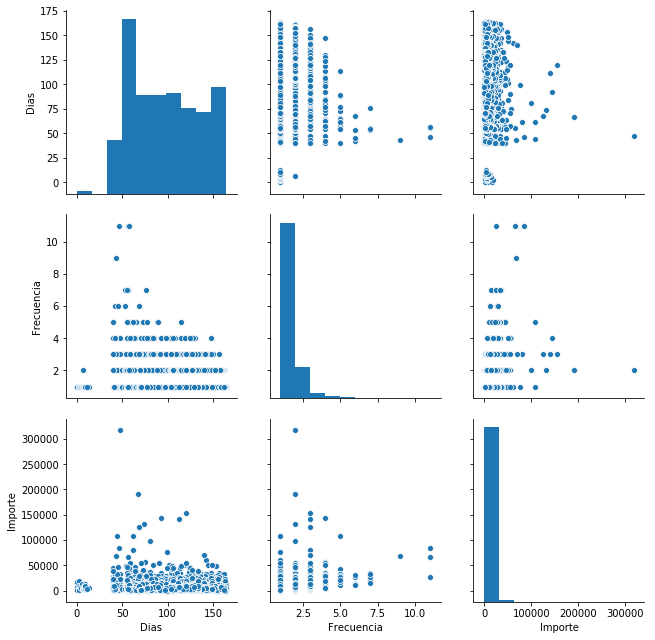

In [39]:
sb.pairplot(RFM4,height=3,vars=['Dias','Frecuencia','Importe'],kind ='scatter')
plt.show()

## Comienza K- means

In [40]:
A = np.array(RFM4[['R_class','F_class','M_class']])
A.shape

(7245, 3)

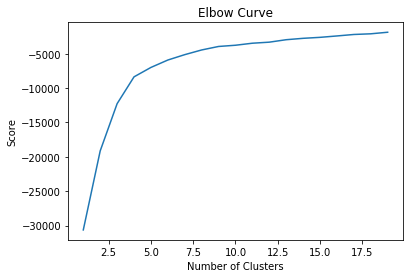

In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(A).score(A) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=4).fit(A)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.96672034 1.39828234 4.51046699]
 [4.19241071 1.07410714 2.17321429]
 [1.53262233 1.25595985 3.96173149]
 [1.71834625 1.04715762 1.39599483]]


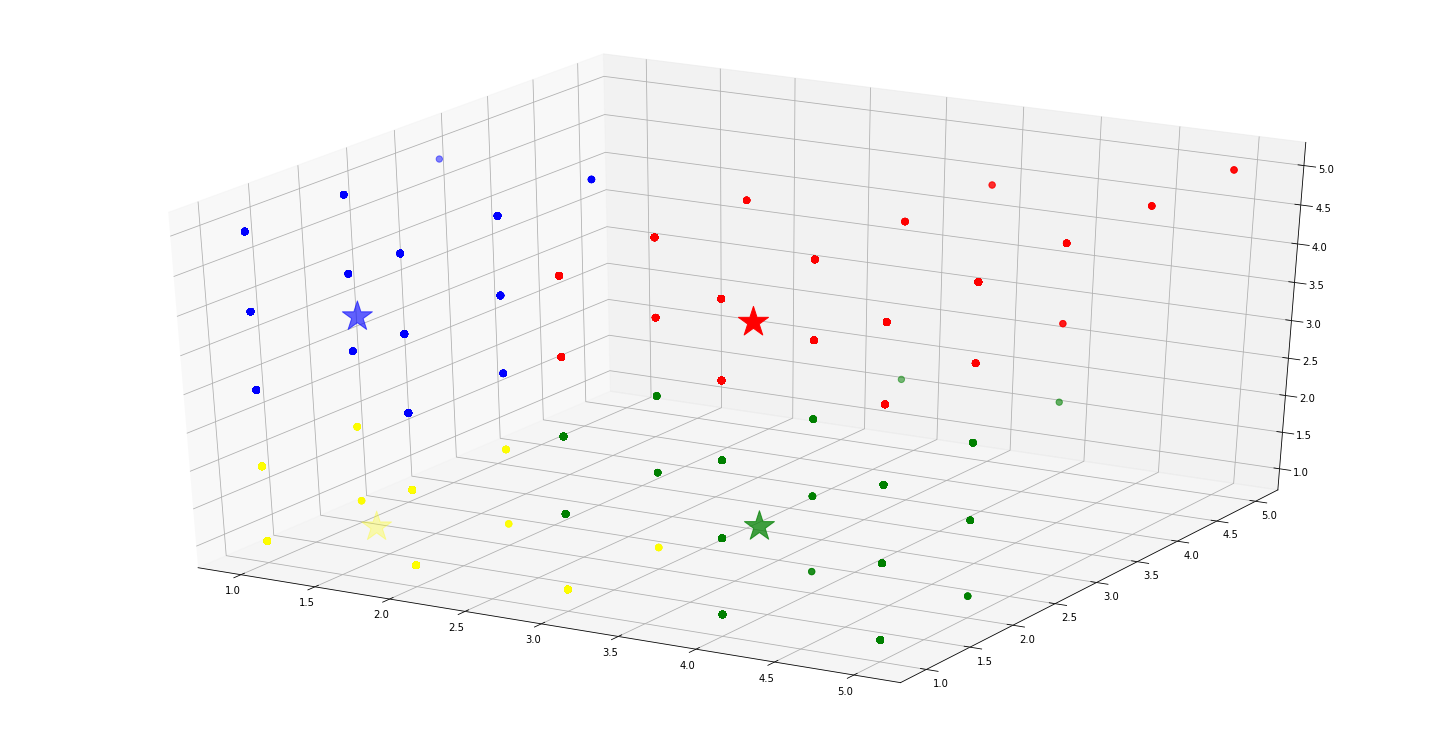

In [43]:
# Predicting the clusters
labels = kmeans.predict(A)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c=asignar,s=40)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [45]:
copia =  pd.DataFrame()
copia['Mail']=RFM4['Mail'].values
#copy['categoria']=dataframe['categoria'].values
copia['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copia.groupby('label').size()
cantidadGrupo

color  cantidad
0     red      1863
1   green      2240
2    blue      1594
3  yellow      1548

In [46]:
RFM6=pd.merge(RFM4,copia,on='Mail')

In [47]:
RFM6

Mail  Fecha_Max  Frecuencia    Importe  \
0                      e.mazazac@gmail.com 2019-12-30           1    4301.72   
1                    osmar220113@gmail.com 2020-01-12           1    4174.14   
2            carlos.gonzalezv.cg@gmail.com 2020-01-12           1    7489.67   
3                      ferson807@gmail.com 2020-01-12           1   17402.74   
4                  jorgeanton1@hotmail.com 2020-01-12           1    1842.25   
5                 fercho23medina@gmail.com 2020-01-10           1    3518.96   
6                 isidro_exito@hotmail.com 2020-01-10           1   18420.69   
7                 grupovengali@outlook.com 2020-01-09           1    8906.21   
8                  teodulo_gtz@hotmsil.com 2020-01-09           1    1625.00   
9        miguel.cordova@c-aabogados.com.mx 2020-01-08           1    6397.42   
10                     esperog12@gmail.com 2020-01-07           1    5600.85   
11                      kmfiesco@gmail.com 2020-01-06           1   13337.93   
12               edgarresendiz@hotmail.com 2020-01-05           2    6620.01   
13                zally-aseret@hotmail.com 2020-01-05           1    2318.97   
14                  luismendieta@gmail.com 2020-01-05           1    3383.02   
15                   facturasrrs@gmail.com 2020-01-04           1    5387.93   
16                   selah2003@hotmail.com 2020-01-04           1    2191.38   
17            graciela-rojas01@hotmail.com 2020-01-03           1    2520.69   
18                     joloman57@gmail.com 2020-01-03           1    4434.48   
19                 monica19689@hotmail.com 2020-01-03           1   13098.28   
20                    mundorh@yahoo.com.mx 2020-01-03           1    9943.10   
21                      malopez@lawyer.com 2020-01-03           1    8235.34   
22                  rcgarcia141@icloud.com 2020-01-01           1    3862.07   
23              flaviocesar110@hotmail.com 2019-11-26           1    4793.11   
24                       charotw@gmail.com 2019-12-01           1    6002.58   
25    lft.luisenrique.cervantes@oulook.com 2019-11-30           1    7909.48   
26                      bofrymex@gmail.com 2019-12-01           4    7538.20   
27                 firedemon1128@gmail.com 2019-11-28           1    2662.85   
28           contacto@t-axeconsultores.com 2019-12-03           5   43172.58   
29             miguel.escobedo@outlook.com 2019-11-30           1    2611.21   
...                                    ...        ...         ...        ...   
7215             luis.montejo@yahoo.com.mx 2019-11-14           1    4071.91   
7216              emosha_1999@yahoo.com.mx 2019-11-15           1    1018.54   
7217                   josue.ggh@gmail.com 2019-11-09           1    2404.31   
7218                    aefespinoza@me.com 2019-11-08           1     508.62   
7219             juanpabloleal99@gmail.com 2019-11-17           1    2581.55   
7220                 ger_alon@yahoo.com.mx 2019-11-02           1    8080.17   
7221              lararioverde@hotmail.com 2019-11-05           3  125046.73   
7222                   inysues@hotmail.com 2019-11-06           1    6887.93   
7223           reginaldo.soto@divol-vw.com 2019-11-02           1    5077.59   
7224            arq.rubenbarocio@gmail.com 2019-10-28           1    3871.55   
7225                   yadirpm@hotmsil.com 2019-11-02           1    5292.24   
7226                 jesusaraujo@gmail.com 2019-11-02           1    7750.00   
7227            antonio.r_1998@hotmail.com 2019-11-02           1    5077.59   
7228          ajesuspenaguerrero@gmail.com 2019-11-03           1   10933.62   
7229          danielpardosalazar@gmail.com 2019-10-15           1    7102.59   
7230             rrosales@ghercules.com.mx 2019-11-01           1    9434.12   
7231               myoortega66@hotmail.com 2019-11-03           1    2232.76   
7232           castellanosneri@hotmail.com 2019-11-03           1    5077.59   
7233                     arzhaus@gmail

In [48]:
RFM6.to_excel('ROb-ClassClientesClustersRFM.xlsx',index=False) 